# THE SPARKS FOUNDATIONS

# Data Science & Business Analytics Tasks

# TASK - 1 : Prediction using Supervised ML

# Name : Akanksha

# IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

# DATA READING

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [4]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# SUMMARY OF THE DATA

In [6]:
data.shape

(25, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


# MISSING VALUE 

In [9]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
## there are no missing values present in the dataset

# EXPLORATORY DATA ANALYSIS

# SCATTER PLOT

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

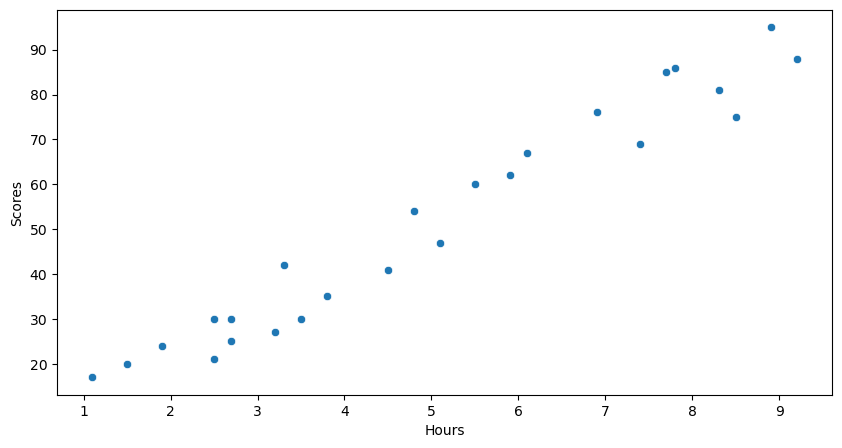

In [11]:
plt.figure(figsize = (10,5))
sns.scatterplot(data['Hours'],data['Scores'])

In [12]:
## There is a positive realtio between hours and scores of the students

# HEATMAP

In [13]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

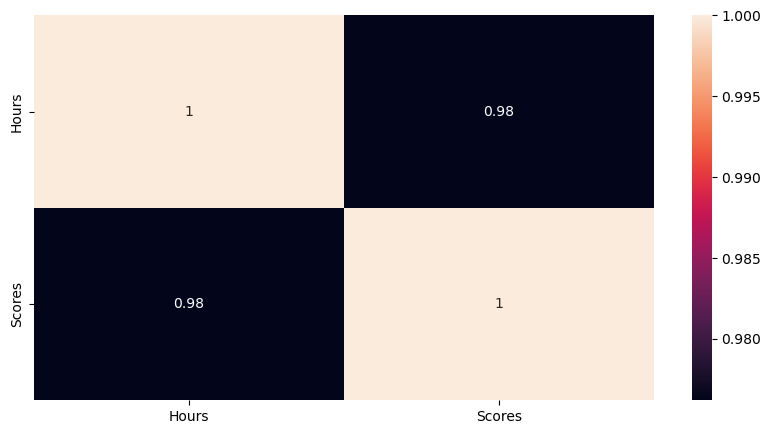

In [14]:
plt.figure(figsize =(10,5))
sns.heatmap(data.corr(),annot = True)

In [15]:
## Heatmap tells us the correlation in the data and we can see that our columns are positively correlated 

In [26]:
sns.set(color_codes = True) ## gives nice background to the graph

# SCATTER PLOT

In [31]:
## it tells the relationship between the variables

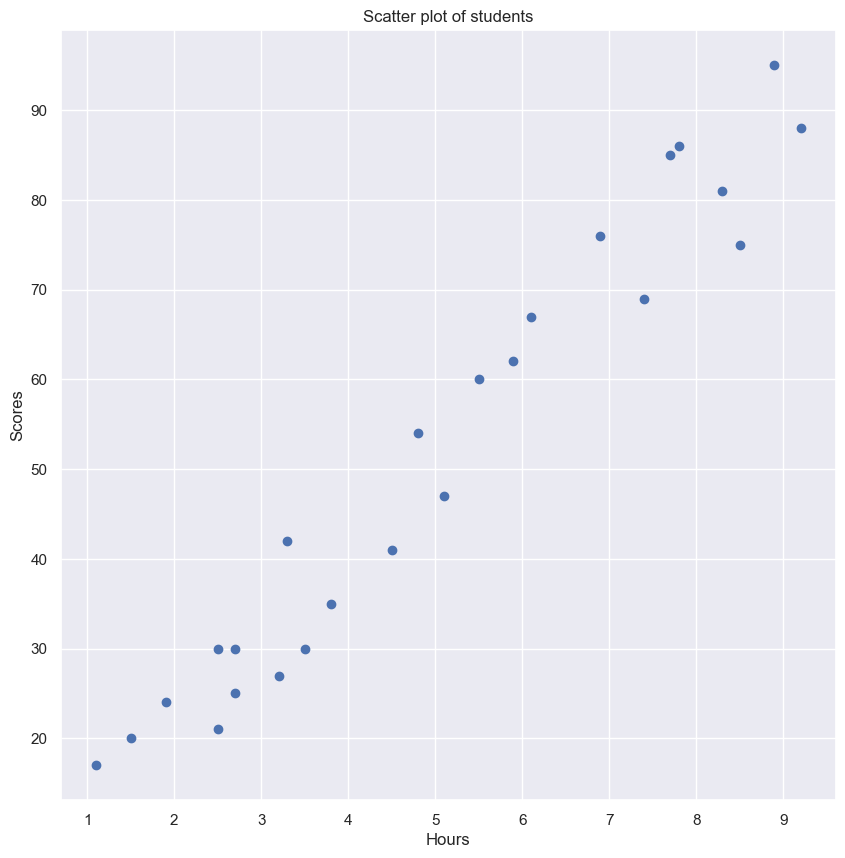

In [34]:
plt.figure(figsize= (10,10))
plt.scatter(data['Hours'], data['Scores'])
plt.title('Scatter plot of students')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)
plt.show()

# BOXPLOT

In [35]:
## IT tells the outliers value present in the data 

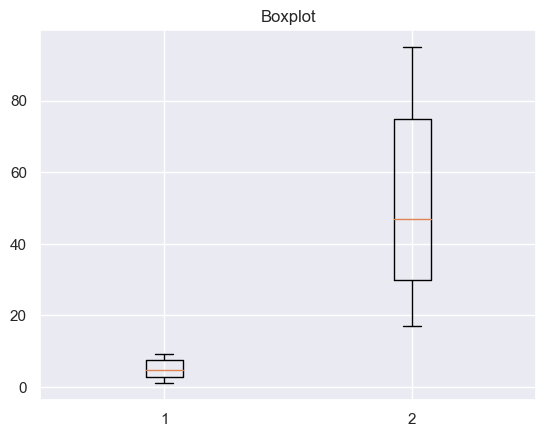

In [36]:
plt.boxplot(data)
plt.title("Boxplot")
plt.show()

# DISTPLOT

<AxesSubplot:xlabel='Hours', ylabel='Density'>

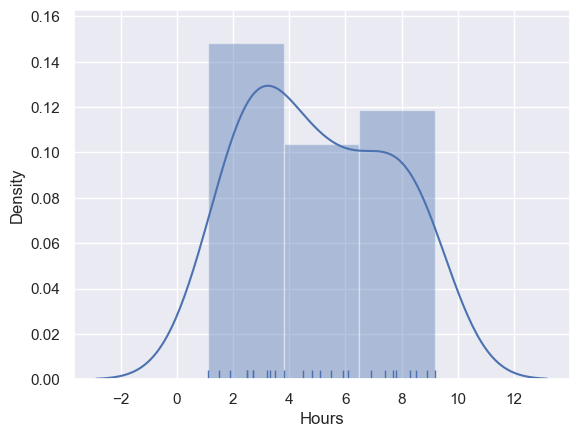

In [41]:
sns.distplot(data['Hours'], kde = True, rug= True)

# JOINtPLOT

In [ ]:
## IT TELLS THE RELATIONSHIP BETWEEN THE TWO VARIABLES AND CREATE A SCATTERPLOT AND HISTOGRAM

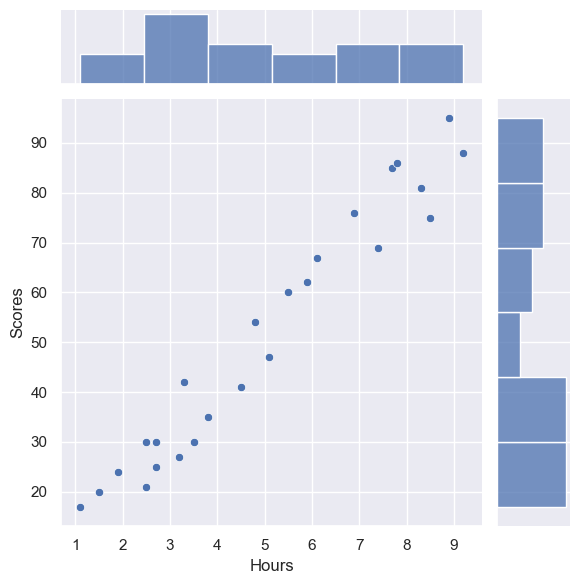

In [43]:
sns.jointplot(data['Hours'], data['Scores'])

# SPLITING THE DATA

In [45]:
## creating feature and target variable 
x = data.drop('Scores', axis = 1).values
y = data['Scores'].values

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

In [48]:
x_train.shape, y_train.shape

((17, 1), (17,))

In [49]:
x_test.shape, y_test.shape

((8, 1), (8,))

# FITTING OUR DATA INTO THE MODEL

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [56]:
model = make_pipeline(StandardScaler(copy=True, with_mean=True, with_std=True), LinearRegression())

model.fit(x_train, y_train)

model.score(x_test, y_test)

0.9549410139157177

In [57]:
y_pred = model.predict(x_test)

In [60]:
pred = pd.DataFrame({'Actual': y_test, 'Pred': y_pred})
pred

,Actual,Pred
0,20,16.805592
1,54,48.443888
2,35,38.856526
3,67,60.907459
4,95,87.752074
5,81,81.999657
6,60,55.155042
7,62,58.989987


In [61]:
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
rmse

4.731965754024222

# EVALUATE OUR MODEL

In [62]:
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error: ', MSE)
print('R2 Score: ', r2)

Mean squared error:  22.391499897258026
R2 Score:  0.9549410139157177


The Mean square error should be as close to zero as possible and the R2 Score should be as close as to 1 as possible

# PLOTTING OUR PREDICTION

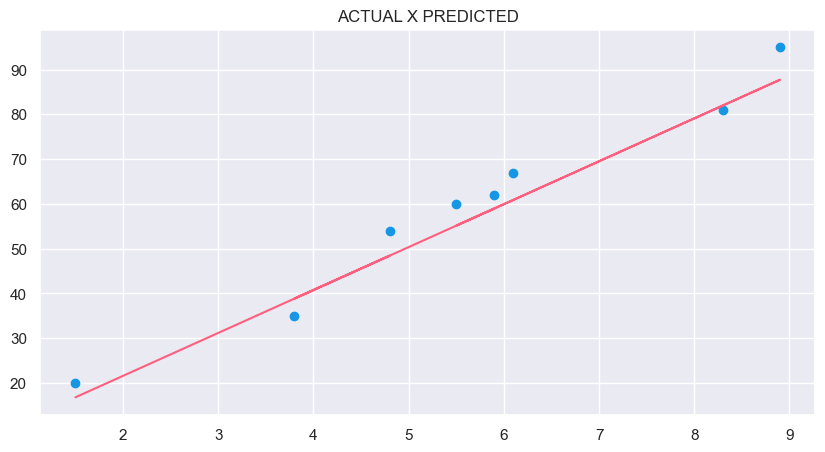

In [69]:
plt.figure(figsize=(10,5))
plt.title("ACTUAL X PREDICTED")
plt.scatter(x_test, y_test, c="#1597E5")
plt.plot(x_test, y_pred, c="#FF5F7E")

# * What will be predicted score if a student studies for 9.25 hrs/ day?

In [71]:
Hours = 9.25
Hrs = np.array(Hours).reshape(-1,1)  
pred = model.predict(Hrs)

print('No. of Hours = {}'.format(Hours))
print('Pred Score = {}'.format(round(pred[0],3)))

No. of Hours = 9.25
Pred Score = 91.108


# ACCORDING TO THIS MODEL : IF A STUDENT STUDIES FOR 9.25hrs A DAY HE IS LIKELY TO SCORE 91.108